<a href="https://colab.research.google.com/github/Mehak1401/MoodBot/blob/main/model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install flair
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from textblob import TextBlob
from flair.models import TextClassifier # This import will work after installing flair
from flair.data import Sentence # This import will work after installing flair
from tqdm.notebook import tqdm
import nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.5/776.5 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 8.0 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=03d0faffc43d3acd89e47c40daa1869f1ad55b30619719ff9fedb4cd017df2e0
  Stored in directory: /root/.cac

In [ ]:
# Download necessary NLTK data
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Load Dataset
df = pd.read_csv('/content/vaccination_tweets.csv').head(500)

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
# Assuming the column containing the tweet text is named 'text' instead of 'Text'
df['vader_sentiment'] = df['text'].apply(lambda x: 'POSITIVE' if sia.polarity_scores(x)['compound'] > 0
                                         else ('NEGATIVE' if sia.polarity_scores(x)['compound'] < 0 else 'NEUTRAL'))

In [ ]:
# Initialize RoBERTa
roberta_model = "cardiffnlp/twitter-roberta-base-sentiment"
roberta_tokenizer = AutoTokenizer.from_pretrained(roberta_model)
roberta_model = AutoModelForSequenceClassification.from_pretrained(roberta_model)

def roberta_sentiment(text):
    encoded_text = roberta_tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    output = roberta_model(**encoded_text)
    scores = softmax(output[0][0].detach().numpy())
    return 'POSITIVE' if scores[2] > max(scores[0], scores[1]) else ('NEGATIVE' if scores[0] > scores[1] else 'NEUTRAL')

df['roberta_sentiment'] = df['text'].apply(roberta_sentiment)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# TextBlob Sentiment
df['textblob_sentiment'] = df['text'].apply(lambda x: 'POSITIVE' if TextBlob(x).sentiment.polarity > 0
                                            else ('NEGATIVE' if TextBlob(x).sentiment.polarity < 0 else 'NEUTRAL'))


In [ ]:
# Flair Sentiment
flair_classifier = TextClassifier.load('en-sentiment')

def flair_sentiment(text):
    sentence = Sentence(text)
    flair_classifier.predict(sentence)
    return sentence.labels[0].value.upper()

df['flair_sentiment'] = df['text'].apply(flair_sentiment)

2024-11-22 17:19:41,261 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpxweik3_c


100%|██████████| 253M/253M [00:15<00:00, 17.0MB/s]

2024-11-22 17:19:57,339 copying /tmp/tmpxweik3_c to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2024-11-22 17:19:57,686 removing temp file /tmp/tmpxweik3_c


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Models for Comparison
model_columns = ['vader_sentiment', 'roberta_sentiment', 'textblob_sentiment', 'flair_sentiment']

In [ ]:
# Agreement Analysis
model_columns = ['vader_sentiment', 'roberta_sentiment', 'textblob_sentiment', 'flair_sentiment']
df['agreement'] = df[model_columns].apply(lambda row: 'MATCH' if len(set(row)) == 1 else 'MISMATCH', axis=1)

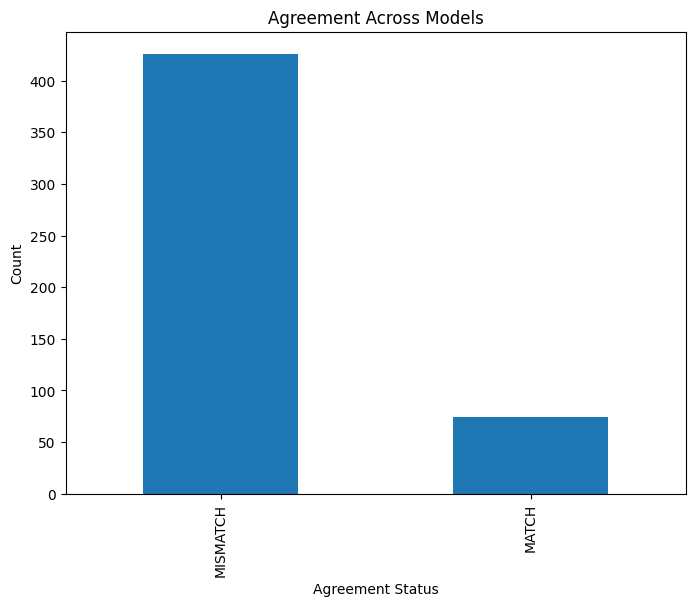

In [ ]:
# Plot Agreement/Mismatch Distribution
agreement_counts = df['agreement'].value_counts()
agreement_counts.plot(kind='bar', title="Agreement Across Models", figsize=(8, 6))
plt.xlabel("Agreement Status")
plt.ylabel("Count")
plt.show()


In [ ]:
# Add Color for Visualization
df['color'] = df['agreement'].apply(lambda x: 'green' if x == 'MATCH' else 'red')

In [ ]:
# Install plotly
!pip install plotly

# Import necessary libraries
import plotly.graph_objects as go  # Import plotly.graph_objects and assign it to go
import pandas as pd
import matplotlib.pyplot as plt


# Plot Table
fig = go.Figure(data=[go.Table(
    columnorder=[1, 2, 3, 4, 5, 6],
    columnwidth=[400, 150, 150, 150, 150, 120],
    header=dict(
        values=['text', 'VADER Sentiment', 'RoBERTa Sentiment', 'TextBlob Sentiment', 'Flair Sentiment', 'Agreement'],
        fill_color='yellow',
        line_color='black',
        align='center',
        height=40
    ),
    cells=dict(
        values=[
            df['text'],
            df['vader_sentiment'],
            df['roberta_sentiment'],
            df['textblob_sentiment'],
            df['flair_sentiment'],
            df['agreement']
        ],
        fill_color=[['lightyellow'] * len(df)] * 5 + [list(df['color'])],
        line_color='black',
        align='left'
    )
)])

fig.update_layout(
    height=700,
    title="Comparison Across Sentiment Analysis Models (VADER, RoBERTa, TextBlob, Flair)"
)

fig.show()

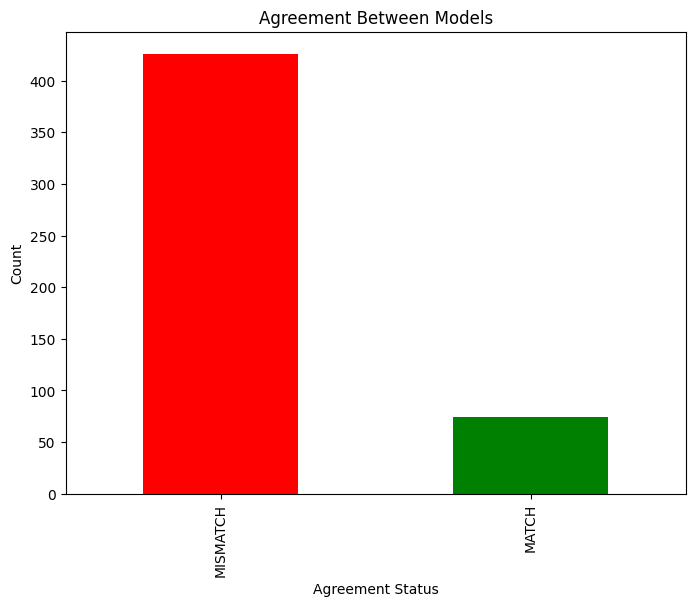

In [ ]:
# Plot Agreement Distribution
agreement_counts = df['agreement'].value_counts()
agreement_counts.plot(kind='bar', color=['red', 'green'], title="Agreement Between Models", figsize=(8, 6))
plt.xlabel("Agreement Status")
plt.ylabel("Count")
plt.show()


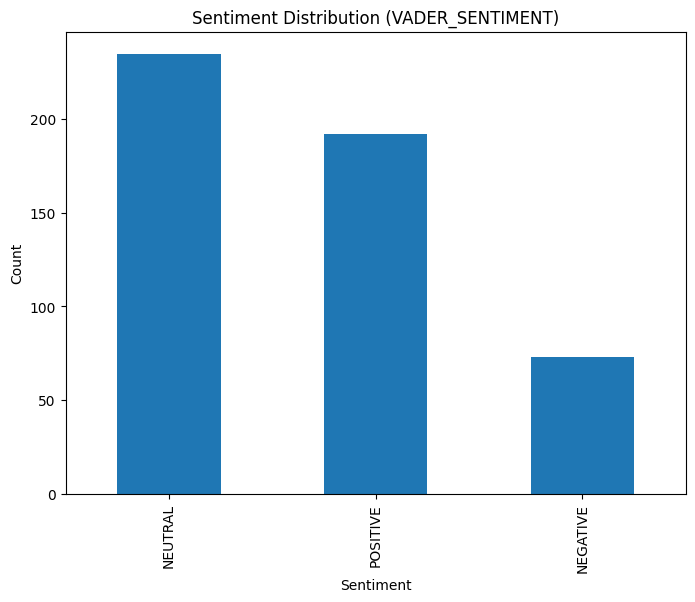

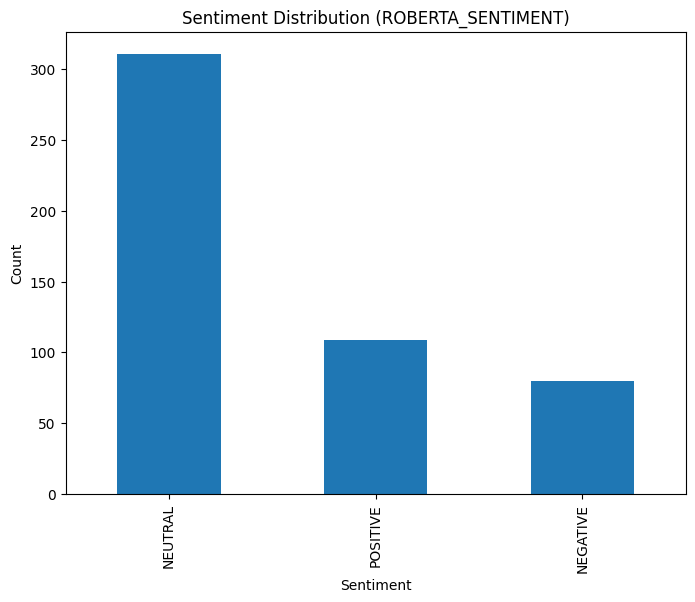

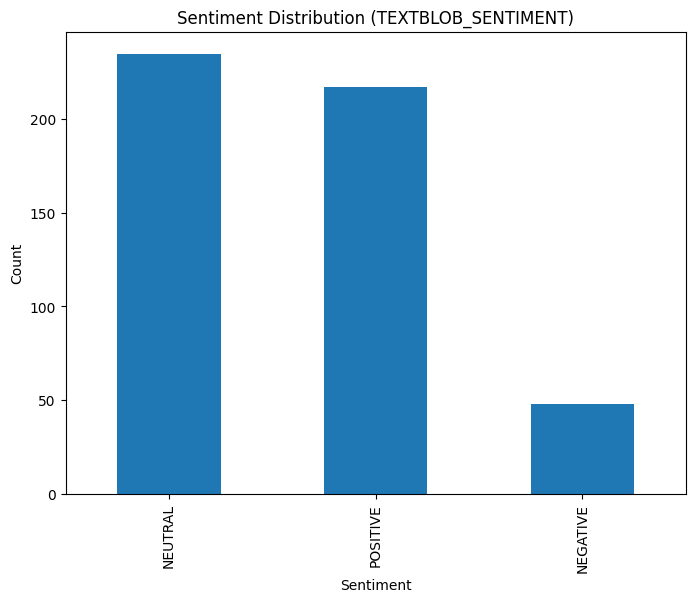

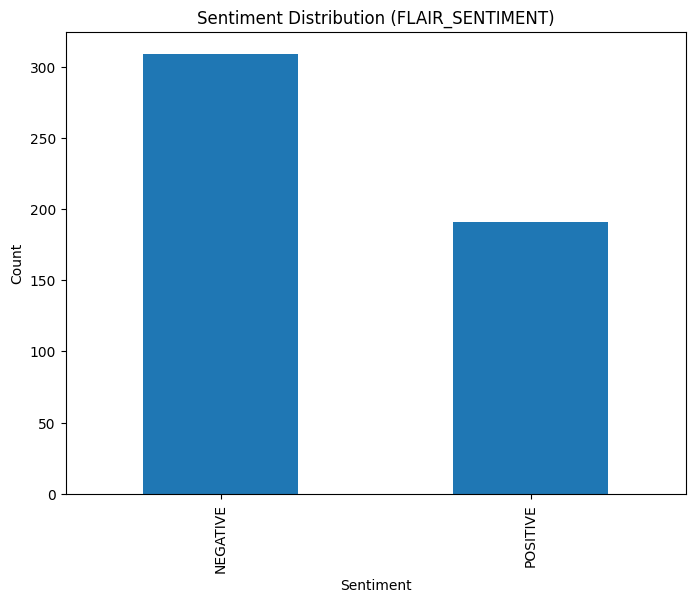

In [ ]:
# Sentiment Distributions
for model in model_columns:
    sentiment_counts = df[model].value_counts()
    sentiment_counts.plot(kind='bar', title=f"Sentiment Distribution ({model.upper()})", figsize=(8, 6))
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

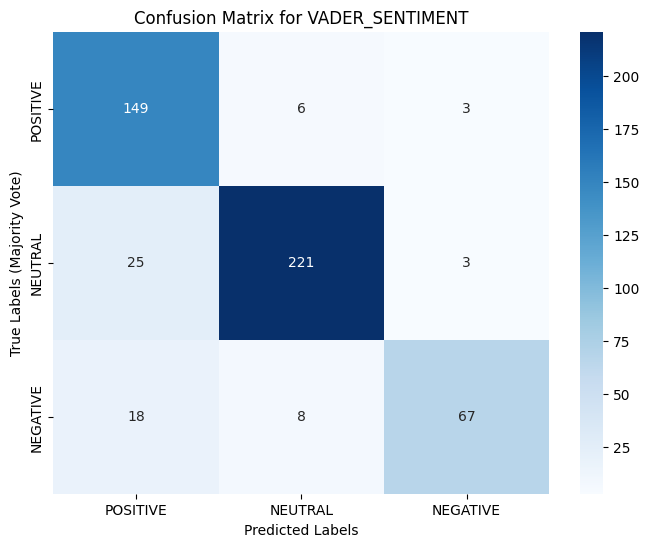

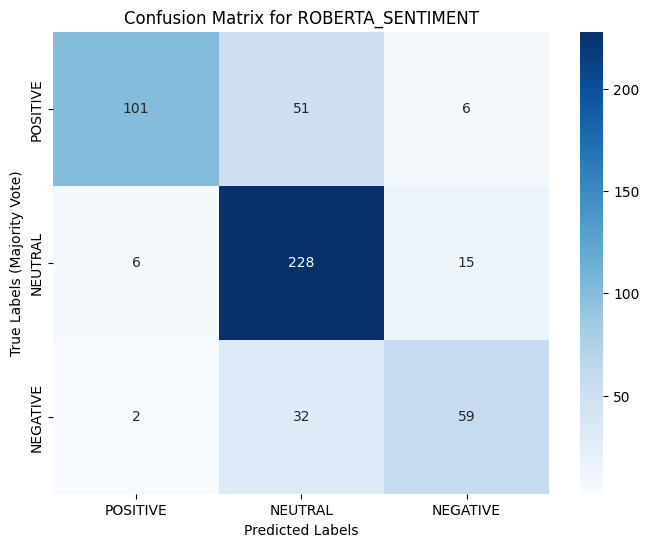

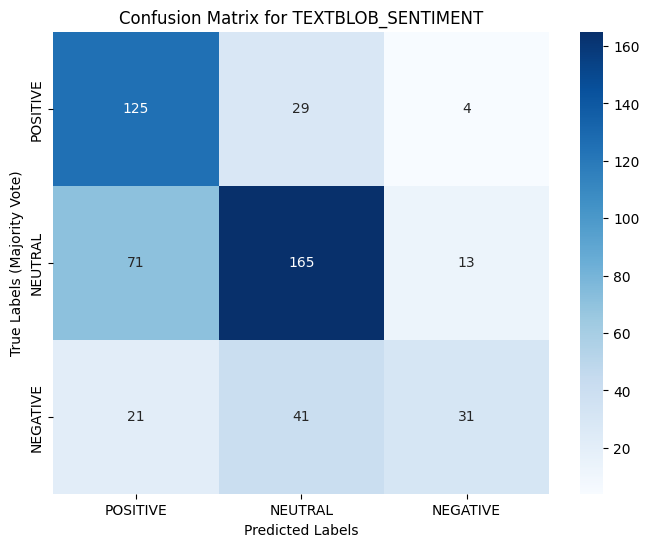

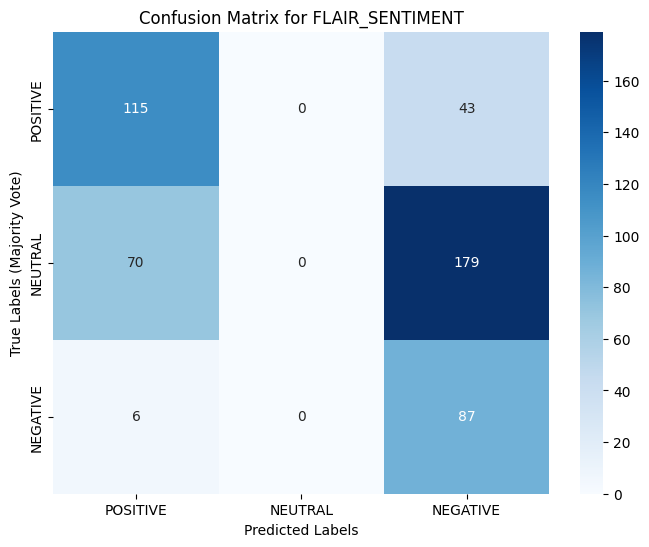

Confusion Matrix Metrics Summary:
                    True Positives  False Positives  False Negatives  \
vader_sentiment                437               63               63   
roberta_sentiment              388              112              112   
textblob_sentiment             321              179              179   
flair_sentiment                202              298              298   

                    True Negatives  
vader_sentiment                -63  
roberta_sentiment             -112  
textblob_sentiment            -179  
flair_sentiment               -298  


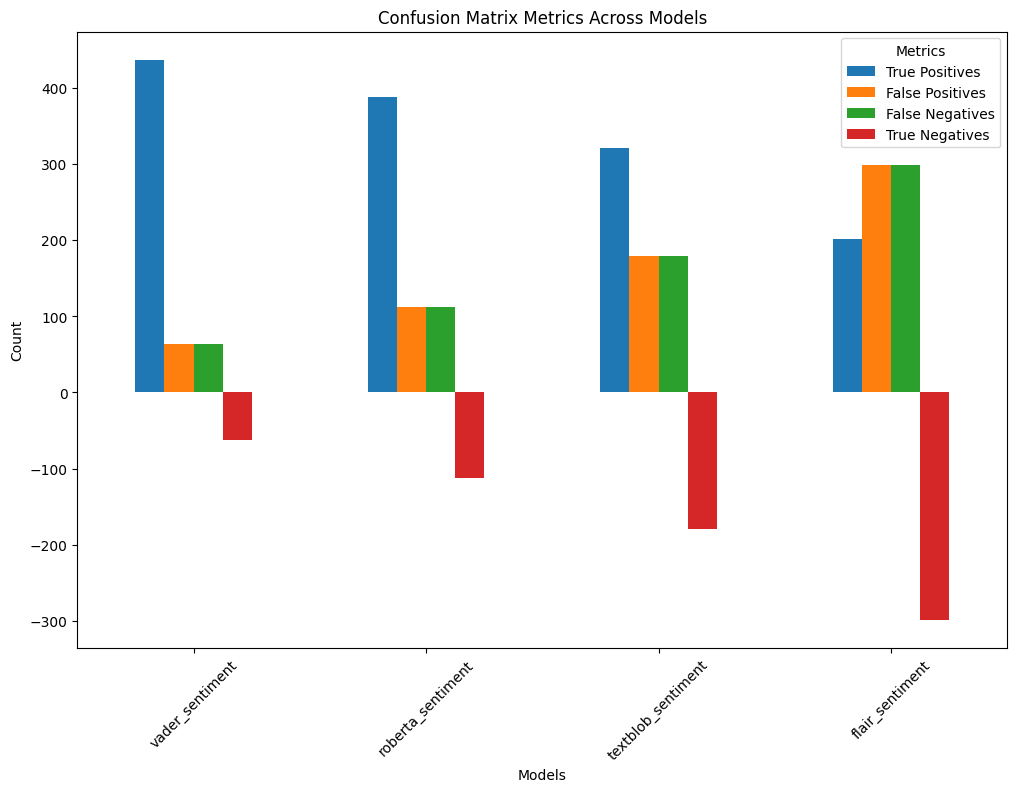

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure these columns exist in your DataFrame
model_columns = ['vader_sentiment', 'roberta_sentiment', 'textblob_sentiment', 'flair_sentiment']

# Step 1: Add majority vote column
def majority_vote(row):
    return row.value_counts().idxmax()

df['majority_vote'] = df[model_columns].apply(majority_vote, axis=1)

# Step 2: Calculate confusion matrices for each model
conf_matrices = {}
for model in model_columns:
    cm = confusion_matrix(df['majority_vote'], df[model], labels=['POSITIVE', 'NEUTRAL', 'NEGATIVE'])
    conf_matrices[model] = cm

    # Step 3: Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['POSITIVE', 'NEUTRAL', 'NEGATIVE'],
                yticklabels=['POSITIVE', 'NEUTRAL', 'NEGATIVE'])
    plt.title(f"Confusion Matrix for {model.upper()}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels (Majority Vote)")
    plt.show()

# Step 4: Summarize metrics from confusion matrices
conf_matrix_summary = {}

for model, cm in conf_matrices.items():
    tp = np.diag(cm).sum()  # True Positives (diagonal sum)
    fp = cm.sum(axis=0) - np.diag(cm)  # False Positives (column sum minus diagonal)
    fn = cm.sum(axis=1) - np.diag(cm)  # False Negatives (row sum minus diagonal)
    tn = cm.sum() - (tp + fp.sum() + fn.sum())  # True Negatives (total - TP - FP - FN)

    conf_matrix_summary[model] = {
        'True Positives': tp,
        'False Positives': fp.sum(),
        'False Negatives': fn.sum(),
        'True Negatives': tn
    }

# Convert confusion matrix summary into a DataFrame
conf_matrix_summary_df = pd.DataFrame(conf_matrix_summary).T
print("Confusion Matrix Metrics Summary:")
print(conf_matrix_summary_df)

# Step 5: Visualize confusion matrix metrics
conf_matrix_summary_df.plot(kind='bar', figsize=(12, 8), title="Confusion Matrix Metrics Across Models")
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Count")
plt.legend(title="Metrics")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure these columns exist in your DataFrame
model_columns = ['vader_sentiment', 'roberta_sentiment', 'textblob_sentiment']

# Step 1: Add majority vote column
def majority_vote(row):
    return row.value_counts().idxmax()

df['majority_vote'] = df[model_columns].apply(majority_vote, axis=1)

# Step 2: Calculate confusion matrices for each model
conf_matrices = {}
for model in model_columns:
    cm = confusion_matrix(df['majority_vote'], df[model], labels=['POSITIVE', 'NEUTRAL', 'NEGATIVE'])
    conf_matrices[model] = cm

    # Step 3: Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['POSITIVE', 'NEUTRAL', 'NEGATIVE'],
                yticklabels=['POSITIVE', 'NEUTRAL', 'NEGATIVE'])
    plt.title(f"Confusion Matrix for {model.upper()}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels (Majority Vote)")
    plt.show()

# Step 4: Summarize metrics from confusion matrices
conf_matrix_summary = {}

for model, cm in conf_matrices.items():
    tp = np.diag(cm).sum()  # True Positives (diagonal sum)
    fp = cm.sum(axis=0) - np.diag(cm)  # False Positives (column sum minus diagonal)
    fn = cm.sum(axis=1) - np.diag(cm)  # False Negatives (row sum minus diagonal)
    tn = cm.sum() - (tp + fp.sum() + fn.sum())  # True Negatives (total - TP - FP - FN)

    conf_matrix_summary[model] = {
        'True Positives': tp,
        'False Positives': fp.sum(),
        'False Negatives': fn.sum(),
        'True Negatives': tn
    }

# Convert confusion matrix summary into a DataFrame
conf_matrix_summary_df = pd.DataFrame(conf_matrix_summary).T

# Display confusion matrix metrics summary as a table
print("Confusion Matrix Metrics Summary:")
print(conf_matrix_summary_df)

# Step 5: Visualize confusion matrix metrics
conf_matrix_summary_df.plot(kind='bar', figsize=(12, 8), title="Confusion Matrix Metrics Across Models (Without Flair)")
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Count")
plt.legend(title="Metrics")
plt.show()


In [ ]:
import plotly.graph_objects as go

# Create a table for the confusion matrix metrics summary
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["Model", "True Positives", "False Positives", "False Negatives", "True Negatives"],
        fill_color='paleturquoise',
        align='center',
        font=dict(size=12, color='black')
    ),
    cells=dict(
        values=[
            conf_matrix_summary_df.index,  # Model names
            conf_matrix_summary_df['True Positives'],
            conf_matrix_summary_df['False Positives'],
            conf_matrix_summary_df['False Negatives'],
            conf_matrix_summary_df['True Negatives']
        ],
        fill_color='lavender',
        align='center',
        font=dict(size=11, color='black')
    )
)])

fig.update_layout(
    title="Confusion Matrix Metrics Summary Table (Without Flair)",
    height=500
)

fig.show()


In [ ]:
import plotly.graph_objects as go

# Prepare the data for the table
# Assuming the DataFrame `df` contains columns: 'Text', 'vader_sentiment', 'roberta_sentiment', 'textblob_sentiment'
# Add a column for agreement or disagreement
df['same_or_different'] = df[model_columns].apply(lambda row: 'Same' if len(set(row)) == 1 else 'Different', axis=1)
df['color'] = df['same_or_different'].apply(lambda x: "green" if x == 'Same' else "red")

# Create the table using Plotly
fig = go.Figure(data=[go.Table(
    columnorder=[1, 2, 3, 4, 5],
    columnwidth=[400, 150, 150, 150, 120],
    header=dict(
        values=["Text", "VADER Sentiment", "RoBERTa Sentiment", "TextBlob Sentiment", "Same or Different"],
        fill_color='magenta',
        align='center',
        font=dict(size=12, color='black')
    ),
    cells=dict(
        values=[
            df['text'],
            df['vader_sentiment'],
            df['roberta_sentiment'],
            df['textblob_sentiment'],
            df['same_or_different']
        ],
        fill_color=[['lightpink'] * len(df)] * 4 + [df['color']],
        align='left',
        font=dict(size=11, color='black')
    )
)])

fig.update_layout(
    title="Comparison Across Sentiment Models (Without Flair)",
    height=800
)

fig.show()


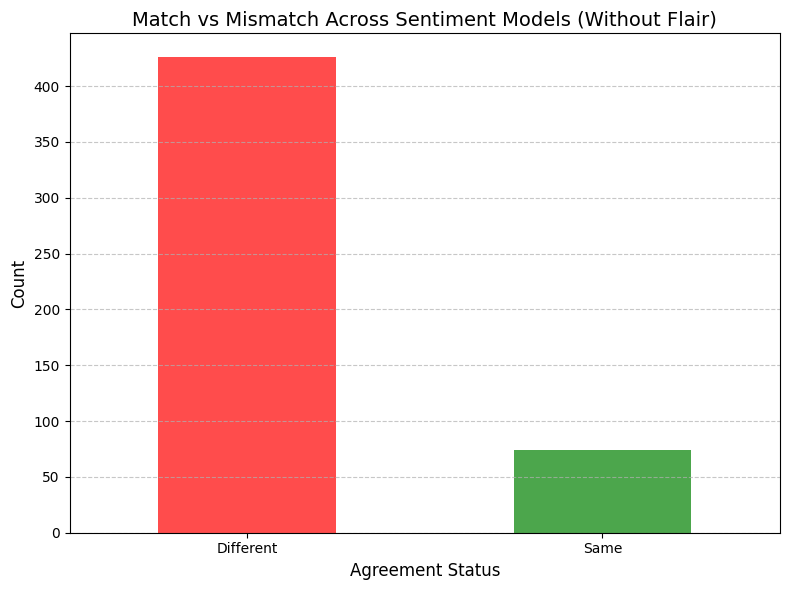

In [ ]:
import matplotlib.pyplot as plt

# Calculate the counts of "Same" and "Different" for match/mismatch graph
match_mismatch_counts = df['same_or_different'].value_counts()

# Plot a bar chart for "Match" and "Mismatch"
plt.figure(figsize=(8, 6))
match_mismatch_counts.plot(kind='bar', color=['red', 'green'], alpha=0.7)
plt.title("Match vs Mismatch Across Sentiment Models (Without Flair)", fontsize=14)
plt.xlabel("Agreement Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


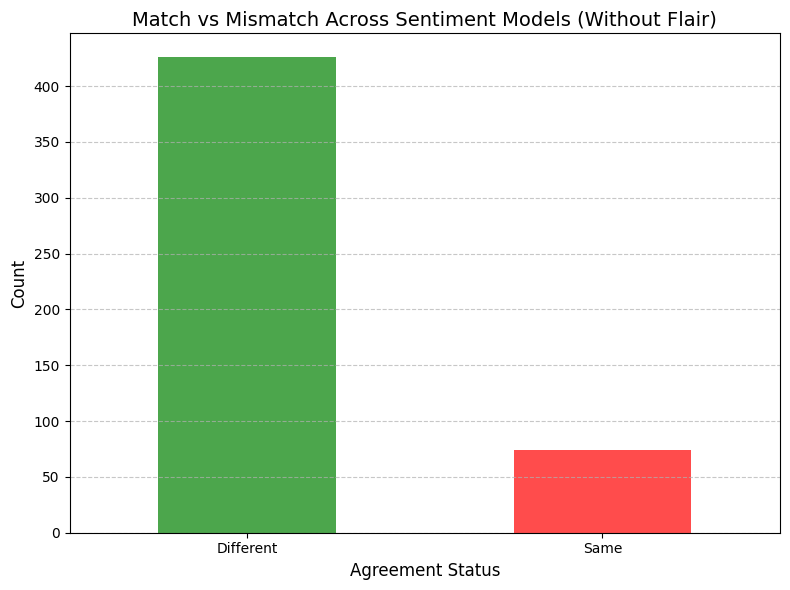

In [ ]:
# Ensure fresh calculations for the same_or_different column
df['same_or_different'] = df[model_columns].apply(lambda row: 'Same' if len(set(row)) == 1 else 'Different', axis=1)
df['color'] = df['same_or_different'].apply(lambda x: "green" if x == 'Same' else "red")

# Generate the updated table
fig = go.Figure(data=[go.Table(
    columnorder=[1, 2, 3, 4, 5],
    columnwidth=[400, 150, 150, 150, 120],
    header=dict(
        values=["Text", "VADER Sentiment", "RoBERTa Sentiment", "TextBlob Sentiment", "Same or Different"],
        fill_color='darkorchid',
        align='center',
        font=dict(size=12, color='white')
    ),
    cells=dict(
        values=[
            df['text'],
            df['vader_sentiment'],
            df['roberta_sentiment'],
            df['textblob_sentiment'],
            df['same_or_different']
        ],
        fill_color=[['lavenderblush'] * len(df)] * 4 + [df['color']],
        align='left',
        font=dict(size=11, color='black')
    )
)])

fig.update_layout(
    title="Updated Comparison Across Sentiment Models (Without Flair)",
    height=800
)

fig.show()
import matplotlib.pyplot as plt

# Calculate the counts of "Same" and "Different" for match/mismatch graph
match_mismatch_counts = df['same_or_different'].value_counts()

# Plot a bar chart for "Match" and "Mismatch"
plt.figure(figsize=(8, 6))
match_mismatch_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title("Match vs Mismatch Across Sentiment Models (Without Flair)", fontsize=14)
plt.xlabel("Agreement Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Add "same_or_different" columns with and without Flair
df['same_or_different_with_flair'] = df[model_columns].apply(
    lambda row: 'Same' if len(set(row)) == 1 else 'Different', axis=1)

# Model columns excluding Flair
model_columns_without_flair = ['vader_sentiment', 'roberta_sentiment', 'textblob_sentiment']
df['same_or_different_without_flair'] = df[model_columns_without_flair].apply(
    lambda row: 'Same' if len(set(row)) == 1 else 'Different', axis=1)

# Find differences between the two
df['difference'] = df['same_or_different_with_flair'] != df['same_or_different_without_flair']

# Display entries where Flair caused a difference
differences_df = df[df['difference']]

# Show table of differences
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(
        values=["Text", "VADER Sentiment", "RoBERTa Sentiment", "TextBlob Sentiment",
                "Flair Sentiment", "With Flair", "Without Flair"],
        fill_color='paleturquoise',
        align='center',
        font=dict(size=12, color='black')
    ),
    cells=dict(
        values=[
            differences_df['text'],
            differences_df['vader_sentiment'],
            differences_df['roberta_sentiment'],
            differences_df['textblob_sentiment'],
            differences_df['flair_sentiment'],
            differences_df['same_or_different_with_flair'],
            differences_df['same_or_different_without_flair']
        ],
        fill_color='lavender',
        align='left',
        font=dict(size=11, color='black')
    )
)])

fig.update_layout(
    title="Differences in Agreement With and Without Flair",
    height=800
)

fig.show()

# Display summary of differences
print(f"Total entries where Flair caused a difference: {len(differences_df)}")


Total entries where Flair caused a difference: 126


Unique 'same_or_different_with_flair': ['Different' 'Same']
Unique 'same_or_different_without_flair': ['Different' 'Same']
Difference Counts: difference
False    374
True     126
Name: count, dtype: int64


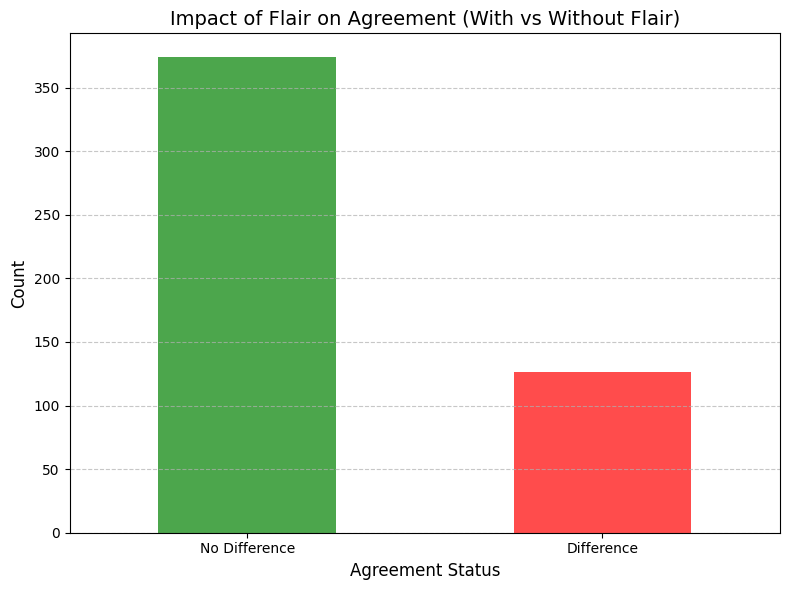

In [ ]:
# Add "same_or_different" columns with and without Flair
df['same_or_different_with_flair'] = df[model_columns].apply(
    lambda row: 'Same' if len(set(row)) == 1 else 'Different', axis=1)

# Define columns without Flair
model_columns_without_flair = ['vader_sentiment', 'roberta_sentiment', 'textblob_sentiment']
df['same_or_different_without_flair'] = df[model_columns_without_flair].apply(
    lambda row: 'Same' if len(set(row)) == 1 else 'Different', axis=1)

# Compute the difference
df['difference'] = df['same_or_different_with_flair'] != df['same_or_different_without_flair']

# Debugging output
print("Unique 'same_or_different_with_flair':", df['same_or_different_with_flair'].unique())
print("Unique 'same_or_different_without_flair':", df['same_or_different_without_flair'].unique())
print("Difference Counts:", df['difference'].value_counts())

# Plot the results
difference_counts = df['difference'].value_counts()

# Plot a bar chart to visualize the difference
plt.figure(figsize=(8, 6))
difference_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title("Impact of Flair on Agreement (With vs Without Flair)", fontsize=14)
plt.xlabel("Agreement Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Difference', 'Difference'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


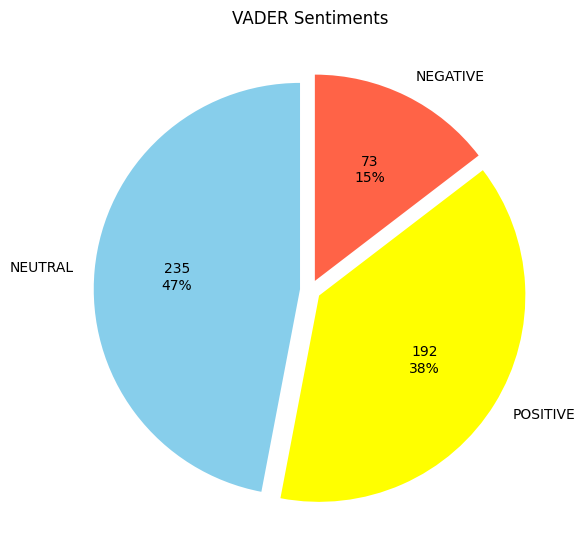

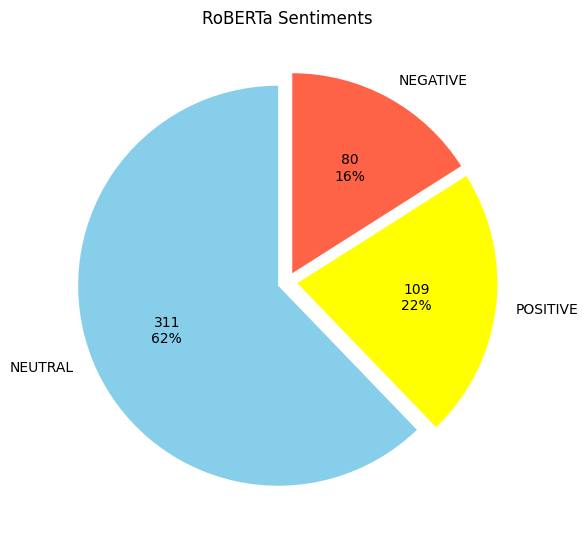

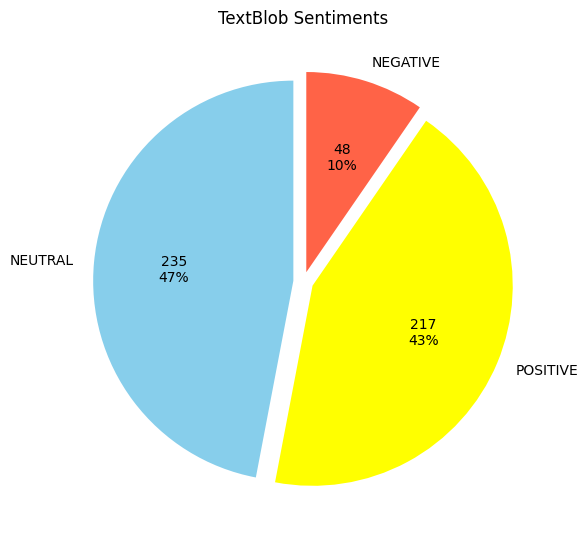

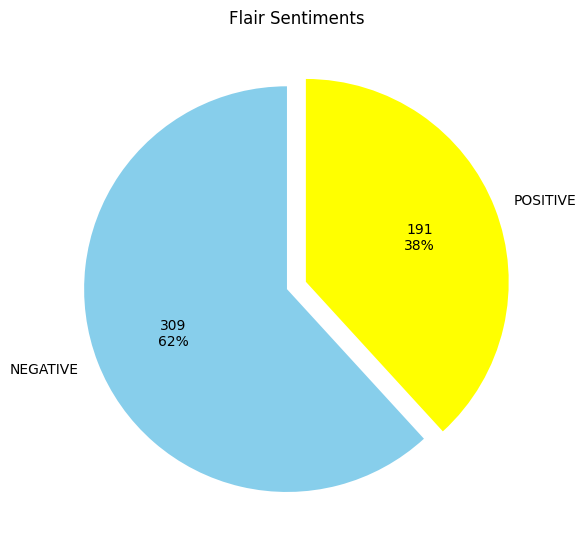

In [ ]:
import matplotlib.pyplot as plt

# Create a function to plot pie charts for sentiment distributions
def plot_sentiment_pie(data, column, title):
    sentiment_counts = data[column].value_counts()
    labels = sentiment_counts.index
    sizes = sentiment_counts.values
    colors = ['skyblue', 'yellow', 'tomato']  # Adjust colors if necessary
    explode = [0.05] * len(labels)  # Slightly separate each slice

    plt.figure(figsize=(6, 6))
    plt.pie(
        sizes,
        labels=labels,
        autopct=lambda p: f'{p * sum(sizes) / 100:.0f}\n{p:.0f}%',
        startangle=90,
        colors=colors,
        explode=explode
    )
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot for VADER Sentiments
plot_sentiment_pie(df, 'vader_sentiment', 'VADER Sentiments')

# Plot for RoBERTa Sentiments
plot_sentiment_pie(df, 'roberta_sentiment', 'RoBERTa Sentiments')

# Plot for TextBlob Sentiments
plot_sentiment_pie(df, 'textblob_sentiment', 'TextBlob Sentiments')

# Plot for Flair Sentiments (if Flair is included in the data)
if 'flair_sentiment' in df.columns:
    plot_sentiment_pie(df, 'flair_sentiment', 'Flair Sentiments')


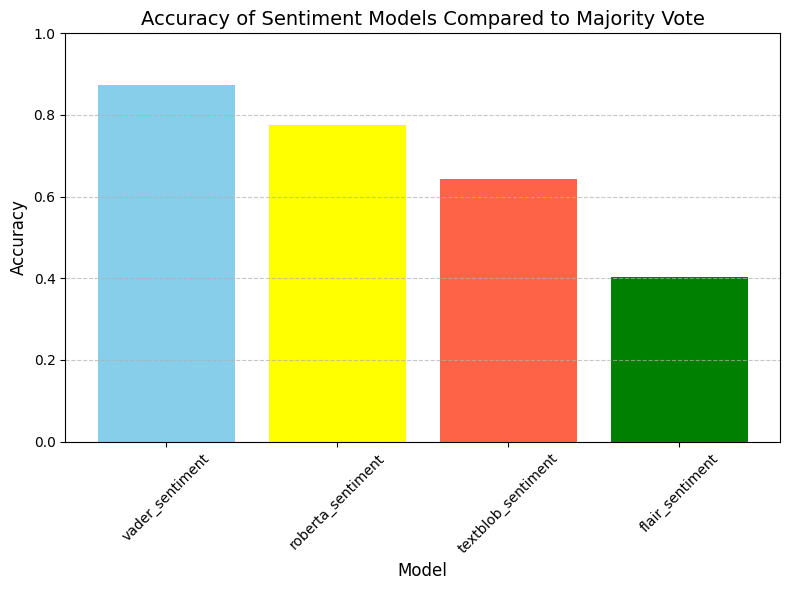

In [ ]:
!pip install ace_tools
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd # Importing pandas explicitly since it's used

# Define the majority vote as pseudo-ground truth
df['majority_vote'] = df[model_columns].apply(lambda row: row.value_counts().idxmax(), axis=1)

# Calculate accuracy for each model
model_accuracies = {}
for model in model_columns:
    model_accuracies[model] = accuracy_score(df['majority_vote'], df[model])

# Convert accuracies to a DataFrame for better visualization
accuracy_df = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Accuracy']).reset_index()
accuracy_df = accuracy_df.rename(columns={'index': 'Model'})

# Plot model accuracies
plt.figure(figsize=(8, 6))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color=['skyblue', 'yellow', 'tomato', 'green'])
plt.title("Accuracy of Sentiment Models Compared to Majority Vote", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
